In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.naive_bayes import GaussianNB

#from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import joblib
#from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from os import walk

import time

%matplotlib inline

In [2]:
pathBase = 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//'
#pathBase = 'E://Chuan//Documents//Database//DICOM//CoroBase//Arrangement//'

theWhole = {}
# theWhole is dictionary containing views (keys) which the values are DICOM files

f = []
f_LCA_Caudal = []
mypath_LCA_Caudal = pathBase + 'LCA_Caudal'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Caudal):
    f.extend(filenames)
for l in f:
    f_LCA_Caudal.append(mypath_LCA_Caudal + '\\' + l) 
    
f = []
f_LCA_Cranial = []
mypath_LCA_Cranial = pathBase + 'LCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial.append(mypath_LCA_Cranial + '\\' + l) 
    
f = []
f_LCA_Cranial_LAO = []
mypath_LCA_Cranial_LAO = pathBase + 'LCA_Cranial_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_LAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_LAO.append(mypath_LCA_Cranial_LAO + '\\' + l) 
    
    
f = []
f_LCA_Cranial_RAO = []
mypath_LCA_Cranial_RAO = pathBase + 'LCA_Cranial_RAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_RAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_RAO.append(mypath_LCA_Cranial_RAO + '\\' + l) 
    
f = []
f_LCA_Spider = []
mypath_LCA_Spider = pathBase + 'LCA_Spider'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Spider):
    f.extend(filenames)
for l in f:
    f_LCA_Spider.append(mypath_LCA_Spider + '\\' + l) 
    
f = []
f_RCA_Cranial = []
mypath_RCA_Cranial = pathBase + 'RCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_Cranial):
    f.extend(filenames)
for l in f:
    f_RCA_Cranial.append(mypath_RCA_Cranial + '\\' + l) 
    
f = []
f_RCA_LAO = []
mypath_RCA_LAO = pathBase + 'RCA_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_LAO):
    f.extend(filenames)
for l in f:
    f_RCA_LAO.append(mypath_RCA_LAO + '\\' + l) 
    

theWhole['LCA_Caudal'] = f_LCA_Caudal
theWhole['LCA_Cranial'] = f_LCA_Cranial
theWhole['LCA_Cranial_LAO'] = f_LCA_Cranial_LAO
theWhole['LCA_Cranial_RAO'] = f_LCA_Cranial_RAO
theWhole['LCA_Spider'] = f_LCA_Spider
theWhole['RCA_Cranial'] = f_RCA_Cranial
theWhole['RCA_LAO'] = f_RCA_LAO

In [3]:
theWhole['LCA_Cranial_LAO']

['I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\04A303A242F04B35BC889915B414E048.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\04A303A242F04B35BC889915B414E048.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\07FFCD52CE914F29B7E4BC877FDE039C.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\07FFCD52CE914F29B7E4BC877FDE039C.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\082257329B3A4223B258DCBAB5C11DEA.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\082257329B3A4223B258DCBAB5C11DEA.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\0AFD257E3761428881D7A2FFAC11F8D3.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_

In [4]:
start = time.time()

array = {}
i = 0

for view in theWhole.keys():
    array[view] = []
    for case in theWhole[view]:
        if case.split('.')[-1] == 'npy':
            arr = np.load(case)
            array[view].append(arr)

end = time.time()
print(end - start)

1.3783178329467773


### 2D to 1D

In [5]:
array_flat = {}

for view in array.keys():
    array_flat[view] = []
    for case in array[view]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        array_flat[view].append(case_flat)

## Naive Bayesian Classification

In [6]:
x_sample_list = []
y_sample_list = []

for y, x in array_flat.items():    
    for x_item in x:
        x_sample_list.append(x_item)
        y_sample_list.append(y)

In [7]:
len(x_sample_list)

954

In [8]:
len(x_sample_list[0])

262144

In [9]:
512*512

262144

In [10]:
len(y_sample_list)

954

In [11]:
y_sample_list

['LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caud

### Training

In [12]:
start = time.time()

X_train = np.array(x_sample_list)
y_train = np.array(y_sample_list)

# Guassian Naive Bayes
#clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
gnb = GaussianNB()
#clf.fit(X_train, y_train)
gnb.fit(X_train, y_train)
end = time.time()

In [13]:
print(end - start)

24.224222421646118


### Prediction

In [14]:
pathBase = 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//test//'
#pathBase = 'I://Chuan//Documents//MyData//NormalCAG//CoroBase//Arrangement//test//'
#pathBase = 'E://Chuan//Documents//Database//DICOM//CoroBase//Arrangement//test//'


theWhole = {}

f = []
f_LCA_Caudal = []
mypath_LCA_Caudal = pathBase + 'LCA_Caudal'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Caudal):
    f.extend(filenames)
for l in f:
    f_LCA_Caudal.append(mypath_LCA_Caudal + '\\' + l) 
    
f = []
f_LCA_Cranial = []
mypath_LCA_Cranial = pathBase + 'LCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial.append(mypath_LCA_Cranial + '\\' + l) 
    
f = []
f_LCA_Cranial_LAO = []
mypath_LCA_Cranial_LAO = pathBase + 'LCA_Cranial_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_LAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_LAO.append(mypath_LCA_Cranial_LAO + '\\' + l) 
    
    
f = []
f_LCA_Cranial_RAO = []
mypath_LCA_Cranial_RAO = pathBase + 'LCA_Cranial_RAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_RAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_RAO.append(mypath_LCA_Cranial_RAO + '\\' + l) 
    
f = []
f_LCA_Spider = []
mypath_LCA_Spider = pathBase + 'LCA_Spider'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Spider):
    f.extend(filenames)
for l in f:
    f_LCA_Spider.append(mypath_LCA_Spider + '\\' + l) 
    
f = []
f_RCA_Cranial = []
mypath_RCA_Cranial = pathBase + 'RCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_Cranial):
    f.extend(filenames)
for l in f:
    f_RCA_Cranial.append(mypath_RCA_Cranial + '\\' + l) 
    
f = []
f_RCA_LAO = []
mypath_RCA_LAO = pathBase + 'RCA_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_LAO):
    f.extend(filenames)
for l in f:
    f_RCA_LAO.append(mypath_RCA_LAO + '\\' + l) 
    

theWhole['LCA_Caudal'] = f_LCA_Caudal
theWhole['LCA_Cranial'] = f_LCA_Cranial
theWhole['LCA_Cranial_LAO'] = f_LCA_Cranial_LAO
theWhole['LCA_Cranial_RAO'] = f_LCA_Cranial_RAO
theWhole['LCA_Spider'] = f_LCA_Spider
theWhole['RCA_Cranial'] = f_RCA_Cranial
theWhole['RCA_LAO'] = f_RCA_LAO

In [15]:
start = time.time()

array = {}
i = 0

for view in theWhole.keys():
    array[view] = []
    for case in theWhole[view]:
        if case.split('.')[-1] == 'npy':
            arr = np.load(case)
            array[view].append(arr)

end = time.time()
print(end - start)

1.7204294204711914


### 2D to 1D

In [16]:
array_flat = {}

for view in array.keys():
    array_flat[view] = []
    for case in array[view]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        array_flat[view].append(case_flat)

In [17]:
x_test_list = []
y_test_list = []

for y, x in array_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

In [18]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_list)

In [34]:
X_test

array([[ 91.23913043,  90.39130435,  91.15217391, ..., 122.15217391,
        121.43478261, 117.58695652],
       [ 92.89473684,  92.52631579,  91.77192982, ..., 127.68421053,
        124.84210526, 124.0877193 ],
       [105.84      , 105.08      , 104.36      , ...,  97.38      ,
         95.6       ,  93.14      ],
       ...,
       [135.70512821, 135.        , 133.34615385, ..., 111.12820513,
        111.15384615, 111.17948718],
       [135.63043478, 137.72826087, 137.0326087 , ...,  94.68478261,
         95.43478261,  95.40217391],
       [121.9375    , 117.84375   , 115.53125   , ...,  75.234375  ,
         77.09375   ,  78.09375   ]])

In [36]:
len(y_test)

70

## Performance Measures

In [19]:
y_predict = gnb.predict(X_test)
y_test = y_test

In [20]:
y_predict

array(['LCA_Caudal', 'LCA_Caudal', 'LCA_Caudal', 'LCA_Caudal',
       'LCA_Caudal', 'LCA_Caudal', 'LCA_Caudal', 'LCA_Caudal',
       'LCA_Caudal', 'LCA_Caudal', 'LCA_Cranial_RAO', 'LCA_Cranial_LAO',
       'LCA_Cranial', 'LCA_Cranial_RAO', 'LCA_Cranial', 'LCA_Cranial',
       'LCA_Cranial', 'LCA_Caudal', 'LCA_Cranial', 'LCA_Cranial',
       'LCA_Cranial_LAO', 'LCA_Cranial_LAO', 'LCA_Cranial_LAO',
       'LCA_Cranial', 'RCA_Cranial', 'LCA_Cranial_LAO', 'LCA_Cranial_LAO',
       'LCA_Cranial', 'LCA_Cranial', 'LCA_Cranial_LAO', 'LCA_Caudal',
       'LCA_Cranial_RAO', 'LCA_Cranial_RAO', 'LCA_Cranial_RAO',
       'LCA_Cranial_RAO', 'LCA_Cranial_RAO', 'LCA_Cranial_RAO',
       'LCA_Cranial_RAO', 'LCA_Cranial_RAO', 'LCA_Caudal', 'LCA_Spider',
       'LCA_Spider', 'LCA_Spider', 'LCA_Spider', 'LCA_Cranial_LAO',
       'LCA_Cranial_LAO', 'LCA_Spider', 'LCA_Spider', 'LCA_Spider',
       'LCA_Cranial_LAO', 'RCA_Cranial', 'RCA_Cranial', 'RCA_Cranial',
       'RCA_Cranial', 'RCA_Cranial', 'RCA_Crani

In [21]:
y_test

array(['LCA_Caudal', 'LCA_Caudal', 'LCA_Caudal', 'LCA_Caudal',
       'LCA_Caudal', 'LCA_Caudal', 'LCA_Caudal', 'LCA_Caudal',
       'LCA_Caudal', 'LCA_Caudal', 'LCA_Cranial', 'LCA_Cranial',
       'LCA_Cranial', 'LCA_Cranial', 'LCA_Cranial', 'LCA_Cranial',
       'LCA_Cranial', 'LCA_Cranial', 'LCA_Cranial', 'LCA_Cranial',
       'LCA_Cranial_LAO', 'LCA_Cranial_LAO', 'LCA_Cranial_LAO',
       'LCA_Cranial_LAO', 'LCA_Cranial_LAO', 'LCA_Cranial_LAO',
       'LCA_Cranial_LAO', 'LCA_Cranial_LAO', 'LCA_Cranial_LAO',
       'LCA_Cranial_LAO', 'LCA_Cranial_RAO', 'LCA_Cranial_RAO',
       'LCA_Cranial_RAO', 'LCA_Cranial_RAO', 'LCA_Cranial_RAO',
       'LCA_Cranial_RAO', 'LCA_Cranial_RAO', 'LCA_Cranial_RAO',
       'LCA_Cranial_RAO', 'LCA_Cranial_RAO', 'LCA_Spider', 'LCA_Spider',
       'LCA_Spider', 'LCA_Spider', 'LCA_Spider', 'LCA_Spider',
       'LCA_Spider', 'LCA_Spider', 'LCA_Spider', 'LCA_Spider',
       'RCA_Cranial', 'RCA_Cranial', 'RCA_Cranial', 'RCA_Cranial',
       'RCA_Cranial', 'RC

### Confusion Matrix (混淆矩阵)

In [22]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=['LCA_Caudal', 'LCA_Cranial', 
                                                          'LCA_Cranial_LAO', 'LCA_Cranial_RAO', 
                                                          'LCA_Spider', 
                                                          'RCA_Cranial', 'RCA_LAO']))
confusion = pd.DataFrame(cm, index=['LCA_Caudal', 'LCA_Cranial', 
                                    'LCA_Cranial_LAO', 'LCA_Cranial_RAO', 'LCA_Spider',
                                    'RCA_Cranial', 'RCA_LAO'],
                        columns=['Predictive LCA_Caudal', 'Predictive LCA_Cranial',
                                 'Predictive LCA_Cranial_LAO', 'Predictive LCA_Cranial_RAO',
                                 'Predictive LCA_Spider',
                                    'Predictive RCA_Cranial', 'Predictive RCA_LAO'])
confusion.to_csv('ConfusionMatrix.csv')
confusion

,Predictive LCA_Caudal,Predictive LCA_Cranial,Predictive LCA_Cranial_LAO,Predictive LCA_Cranial_RAO,Predictive LCA_Spider,Predictive RCA_Cranial,Predictive RCA_LAO
LCA_Caudal,10,0,0,0,0,0,0
LCA_Cranial,1,6,1,2,0,0,0
LCA_Cranial_LAO,0,3,6,0,0,1,0
LCA_Cranial_RAO,2,0,0,8,0,0,0
LCA_Spider,0,0,3,0,7,0,0
RCA_Cranial,0,0,0,0,0,9,1
RCA_LAO,0,0,0,0,0,2,8


In [23]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

     LCA_Caudal       0.77      1.00      0.87        10
    LCA_Cranial       0.67      0.60      0.63        10
LCA_Cranial_LAO       0.60      0.60      0.60        10
LCA_Cranial_RAO       0.80      0.80      0.80        10
     LCA_Spider       1.00      0.70      0.82        10
    RCA_Cranial       0.75      0.90      0.82        10
        RCA_LAO       0.89      0.80      0.84        10

      micro avg       0.77      0.77      0.77        70
      macro avg       0.78      0.77      0.77        70
   weighted avg       0.78      0.77      0.77        70



In [24]:
confusion.index

Index(['LCA_Caudal', 'LCA_Cranial', 'LCA_Cranial_LAO', 'LCA_Cranial_RAO',
       'LCA_Spider', 'RCA_Cranial', 'RCA_LAO'],
      dtype='object')

In [25]:
confusion.columns

Index(['Predictive LCA_Caudal', 'Predictive LCA_Cranial',
       'Predictive LCA_Cranial_LAO', 'Predictive LCA_Cranial_RAO',
       'Predictive LCA_Spider', 'Predictive RCA_Cranial',
       'Predictive RCA_LAO'],
      dtype='object')

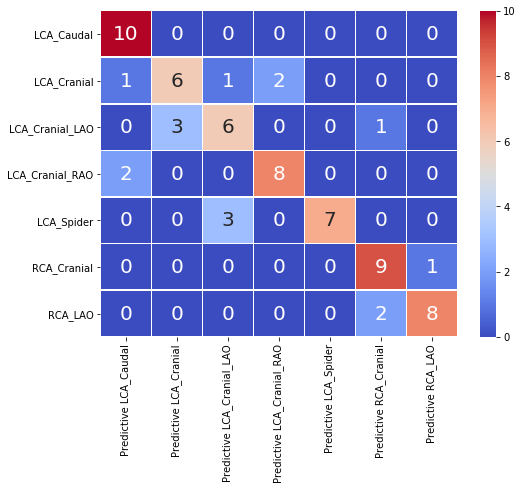

In [32]:
plt.figure(figsize=(8,6))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

In [33]:
heat_map.figure.savefig("Heatmap_NaiveBayesian.png", dpi=400)

## Save the Model

In [30]:
c = joblib.dump(gnb, 'trained_model_gnb.m')
print(c)

['trained_model_gnb.m']


## Load the Model

In [31]:
d = joblib.load('trained_model_gnb.m')
print(d)

GaussianNB(priors=None, var_smoothing=1e-09)
